In [2]:
import numpy as np
import pandas as pd
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy.spatial import distance
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Task1 - ROC AUC

In [62]:
def ROC_AUC(y, probabilities):
    shifts = sorted(list(zip(probabilities, y)), reverse=True)
    step_x = 1/np.where(y != 1)[0].shape[0]
    step_y = 1/np.where(y == 1)[0].shape[0]
    points_x = [0]
    points_y = [0]
    last_x = 0
    last_y = 0
    auc = 0
    for prob, sample_y in shifts:
        if sample_y == 1:
            points_x.append(last_x)
            last_y += step_y
            points_y.append(last_y)
        else:
            points_y.append(last_y)
            last_x += step_x
            points_x.append(last_x)
            auc += step_x * last_y
    return auc, points_x, points_y

Spam dataset

In [55]:
spam_df = pd.read_csv('../data/spam.csv')
X = spam_df[spam_df.columns.difference(['label'])]
y = spam_df.label.values

In [76]:
column2auc = Counter()
for column in X.columns:
    auc, points_x, points_y = ROC_AUC(y, X[column].values)
    column2auc[column] = auc
for column, auc in column2auc.most_common():
    print(f"feature: {column}, auc: {auc}")

feature: word_freq_3d, auc: 0.9971808103597595
feature: word_freq_font, auc: 0.9922898625501807
feature: word_freq_remove, auc: 0.9879969786200758
feature: word_freq_credit, auc: 0.9854676214586219
feature: word_freq_table, auc: 0.9842580407245485
feature: word_freq_addresses, auc: 0.9841225217839465
feature: word_freq_money, auc: 0.9840760298846158
feature: word_freq_parts, auc: 0.9818481776362676
feature: word_freq_000, auc: 0.979980192472525
feature: word_freq_receive, auc: 0.9579938765222815
feature: word_freq_report, auc: 0.9576492429536267
feature: word_freq_cs, auc: 0.947276009942558
feature: char_freq_$, auc: 0.9461034248900779
feature: word_freq_internet, auc: 0.940953309471466
feature: word_freq_free, auc: 0.9396115730405713
feature: word_freq_order, auc: 0.9356275140247442
feature: word_freq_conference, auc: 0.9331258541650193
feature: char_freq_#, auc: 0.9284192912498068
feature: word_freq_857, auc: 0.9272140629488623
feature: word_freq_business, auc: 0.9268175958584001
fea

Text(0.5, 1.0, '[SPAM] Feature: word_freq_3d, AUC: 0.9971808103597595')

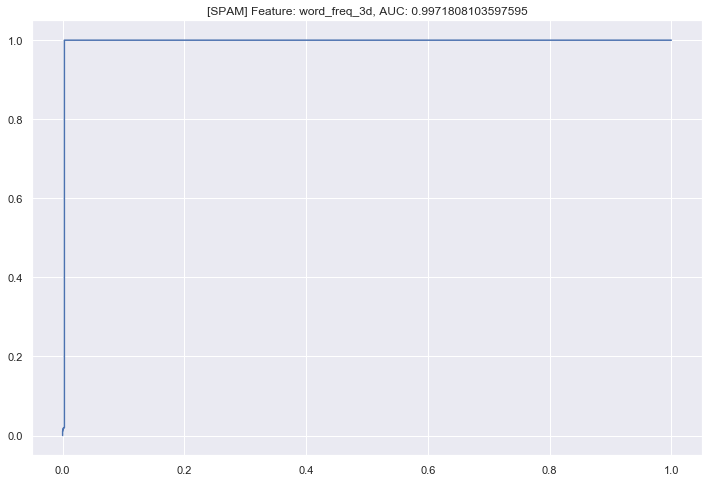

In [80]:
plt.figure(figsize=(12, 8))
feature = 'word_freq_3d'
auc, points_x, points_y = ROC_AUC(y, X[feature].values)
plt.plot(points_x, points_y)
plt.title(f"[SPAM] Feature: {feature}, AUC: {auc}")

Text(0.5, 1.0, '[SPAM] Feature: word_freq_font, AUC: 0.9922898625501807')

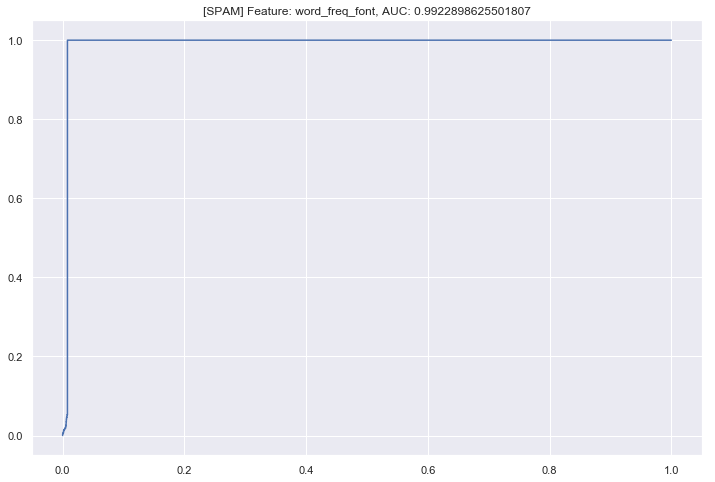

In [81]:
plt.figure(figsize=(12, 8))
feature = 'word_freq_font'
auc, points_x, points_y = ROC_AUC(y, X[feature].values)
plt.plot(points_x, points_y)
plt.title(f"[SPAM] Feature: {feature}, AUC: {auc}")

Text(0.5, 1.0, '[SPAM] Feature: word_freq_remove, AUC: 0.9879969786200758')

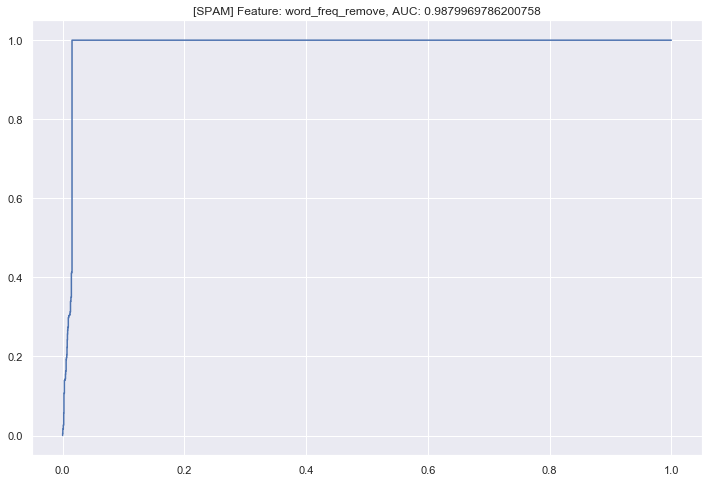

In [82]:
plt.figure(figsize=(12, 8))
feature = 'word_freq_remove'
auc, points_x, points_y = ROC_AUC(y, X[feature].values)
plt.plot(points_x, points_y)
plt.title(f"[SPAM] Feature: {feature}, AUC: {auc}")

Cancer

In [84]:
cancer_df = pd.read_csv('../data/cancer.csv')
cancer_df['int_label'] = cancer_df.label.map({'M':1, 'B':0})
cancer_df['label'] = cancer_df.int_label
cancer_df.drop('int_label', axis=1, inplace=True)
X = cancer_df[cancer_df.columns.difference(['label'])]
y = cancer_df.label.values

In [85]:
column2auc = Counter()
for column in X.columns:
    auc, points_x, points_y = ROC_AUC(y, X[column].values)
    column2auc[column] = auc
for column, auc in column2auc.most_common():
    print(f"feature: {column}, auc: {auc}")

feature: 23, auc: 0.9755562602399477
feature: 21, auc: 0.9705618096295139
feature: 24, auc: 0.9698615295174705
feature: 28, auc: 0.9667829395909339
feature: 8, auc: 0.9644574811056521
feature: 3, auc: 0.9469504783045332
feature: 4, auc: 0.9383621373077581
feature: 7, auc: 0.9378600496802523
feature: 1, auc: 0.9377147085249237
feature: 14, auc: 0.9264705882352992
feature: 27, auc: 0.9214100734633532
feature: 13, auc: 0.8764335923048482
feature: 11, auc: 0.8683737646001827
feature: 6, auc: 0.8638681887849513
feature: 26, auc: 0.8623751387347436
feature: 18, auc: 0.7919771682257851
feature: 22, auc: 0.7848026002854009
feature: 17, auc: 0.7808651762591841
feature: 2, auc: 0.7760689181332937
feature: 25, auc: 0.754598065641354
feature: 29, auc: 0.7371571270017471
feature: 16, auc: 0.7273399926008156
feature: 5, auc: 0.7224776703134109
feature: 9, auc: 0.6990645314729689
feature: 30, auc: 0.686089530151686
feature: 20, auc: 0.6203689022778948
feature: 12, auc: 0.5117726335817364
feature: 10,

Text(0.5, 1.0, '[Cancer] Feature: 23, AUC: 0.9755562602399477')

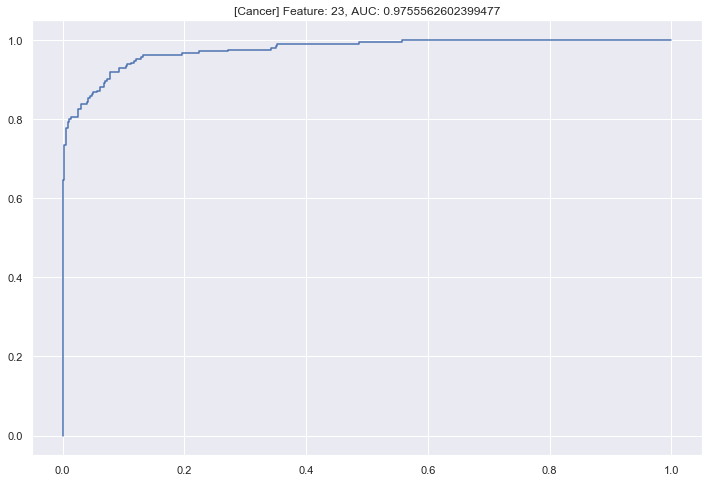

In [86]:
plt.figure(figsize=(12, 8))
feature = '23'
auc, points_x, points_y = ROC_AUC(y, X[feature].values)
plt.plot(points_x, points_y)
plt.title(f"[Cancer] Feature: {feature}, AUC: {auc}")

Text(0.5, 1.0, '[Cancer] Feature: 21, AUC: 0.9705618096295139')

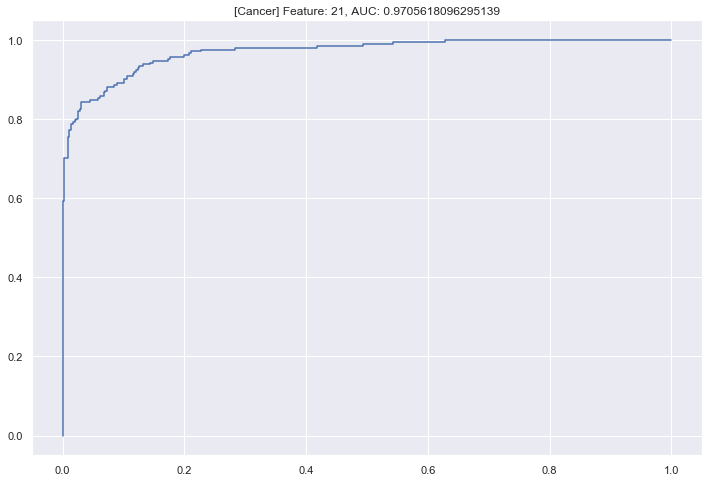

In [87]:
plt.figure(figsize=(12, 8))
feature = '21'
auc, points_x, points_y = ROC_AUC(y, X[feature].values)
plt.plot(points_x, points_y)
plt.title(f"[Cancer] Feature: {feature}, AUC: {auc}")

Text(0.5, 1.0, '[Cancer] Feature: 24, AUC: 0.9698615295174705')

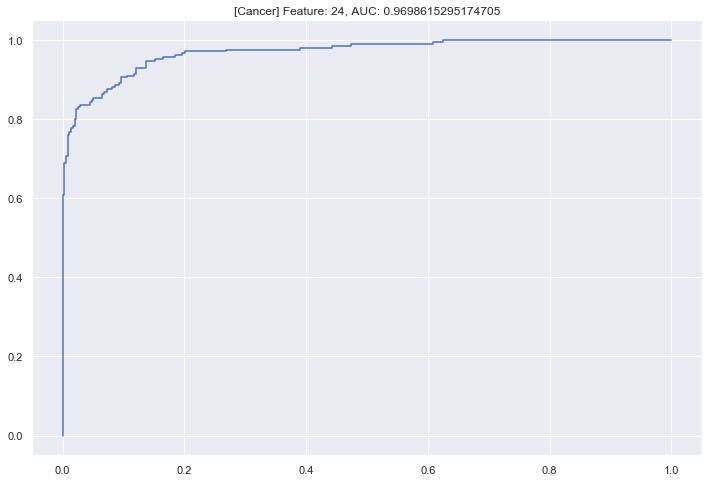

In [88]:
plt.figure(figsize=(12, 8))
feature = '24'
auc, points_x, points_y = ROC_AUC(y, X[feature].values)
plt.plot(points_x, points_y)
plt.title(f"[Cancer] Feature: {feature}, AUC: {auc}")

### Task 2 - Train/validation sets

Spam

In [15]:
spam_df = pd.read_csv('../data/spam.csv')
X = spam_df[spam_df.columns.difference(['label'])]
y = spam_df.label.values
spam_X_train, spam_X_val, spam_y_train, spam_y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Cancer

In [16]:
cancer_df = pd.read_csv('../data/cancer.csv')
cancer_df['int_label'] = cancer_df.label.map({'M':1, 'B':0})
cancer_df['label'] = cancer_df.int_label
cancer_df.drop('int_label', axis=1, inplace=True)
X = cancer_df[cancer_df.columns.difference(['label'])]
y = cancer_df.label.values
cancer_X_train, cancer_X_val, cancer_y_train, cancer_y_val = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [93]:
cancer_df.sample(3)

,label,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
281,0,11.74,14.02,74.24,427.3,0.07813,0.0434,0.02245,0.02763,0.2101,...,13.31,18.26,84.70,533.7,0.1036,0.0850,0.06735,0.0829,0.3101,0.06688
9,1,12.46,24.04,83.97,475.9,0.11860,0.2396,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.2210,0.4366,0.20750
521,1,24.63,21.60,165.50,1841.0,0.10300,0.2106,0.23100,0.14710,0.1991,...,29.92,26.93,205.70,2642.0,0.1342,0.4188,0.46580,0.2475,0.3157,0.09671


### Decision tree

In [169]:
class DecisionTree():
    class Node():
        def __init__(self):
            self.rule = -1
            self.threshold = None
            self.left_node = None
            self.right_node = None
            self.node_class = None
            
    def __init__(self, debug=''):
        self.tree = None
        self.debug = debug
        self.impurity_f = {'entropy': self.get_entropy}
    
    def get_entropy(self, cnt, n):
        entropy = 0
        for _, class_n in cnt.most_common():
            if class_n > 0:
                entropy -= (class_n/n * np.log2(class_n/n))
        return entropy
        
    def get_IG_threshold(self, v, y, n, impurity_f):
        sorted_vy = sorted(list(zip(v, y)))
        best_threshold = None
        best_IG = None
        y_left_cnt = Counter()
        y_right_cnt = Counter([t[1] for t in sorted_vy[0:]])
        n_left = 0
        n_right = len(sorted_vy)
        total_IG = n_right/n * impurity_f(y_right_cnt, n_right) # all values    
        for pos, (v, y) in enumerate(sorted_vy):
            if pos > 0 and (sorted_vy[pos][0] != sorted_vy[pos-1][0]):
                left_IG = n_left/n * impurity_f(y_left_cnt, n_left)
                right_IG = n_right/n * impurity_f(y_right_cnt, n_right)
                IG = total_IG - left_IG - right_IG
                if best_IG is None or IG > best_IG:
                    best_IG = IG
                    best_threshold = v
            y_left_cnt[y] = y_left_cnt[y] + 1
            n_left += 1
            y_right_cnt[y] -= 1
            n_right -= 1
        return best_IG, best_threshold
    
    def build_tree(self, node, X, y, n, level, max_level, impurity):
        cnt_y = Counter(y)
        if len(cnt_y) == 1:
            node.node_class = y[0]
            return
        if level == max_level:
            node.node_class = cnt_y.most_common()[0][0]
            return
        features_num = X.shape[1]
        features2IG = []
        for feature in range(0, features_num):
            IG, threshold = self.get_IG_threshold(X[:, feature], y, n, self.impurity_f[impurity])
            if IG is not None:
                features2IG.append((IG, threshold, feature))
        if len(features2IG) == 0:
            node.node_class = y[0]
            return
        IG, threshold, best_feature = sorted(features2IG, reverse=True)[0] # get always max
        node.IG = IG
        node.rule = best_feature
        node.threshold = threshold
        if 'v' in self.debug:
            print(f"[L{level}] n: {X.shape[0]}, feature: {node.rule}, threshold: {node.threshold}, IG: {IG}")
        
        # Left subtree
        node.left_node = self.Node()
        if 'vvv' in self.debug:
            print(f"[L{level}] Samples to left: {X[X[:, best_feature] < threshold].shape[0]}")
        self.build_tree(node.left_node,
                        X[X[:, best_feature] < threshold],
                        y[X[:, best_feature] < threshold],
                        n, level+1, max_level, impurity)
        # Right subtree
        node.right_node = self.Node()
        if 'vvv' in self.debug:
            print(f"[L{level}] Samples to right: {X[X[:, best_feature] >= threshold].shape[0]}")
        self.build_tree(node.right_node,
                        X[X[:, best_feature] >= threshold],
                        y[X[:, best_feature] >= threshold],
                        n, level+1, max_level, impurity) 
        return
        
    
    def fit(self, X, y, max_level=10, impurity='entropy'):
        self.tree = self.Node()
        self.build_tree(self.tree, X, y, X.shape[0], 1, max_level, impurity)
        
    def predict(self, X):
        predictions = []
        for sample in X:
            current_node = self.tree
            while current_node.node_class is None:
                if sample[current_node.rule] < current_node.threshold:
                    current_node = current_node.left_node
                else:
                    current_node = current_node.right_node
            predictions.append(current_node.node_class)
        return predictions

In [170]:
dtree = DecisionTree(debug='v')
dtree.fit(spam_X_train.values, spam_y_train, max_level=10, impurity='entropy')

[L1] n: 3680, feature: 5, threshold: 0.055999999999999994, IG: 0.25123060720284096
[L2] n: 2779, feature: 49, threshold: 0.08, IG: 0.12248534465232284
[L3] n: 2523, feature: 3, threshold: 0.198, IG: 0.07689935612449689
[L4] n: 2040, feature: 30, threshold: 0.03, IG: 0.0229543461072162
[L5] n: 1311, feature: 29, threshold: 0.01, IG: 0.019005778100284726
[L6] n: 986, feature: 41, threshold: 0.02, IG: 0.0166089241124562
[L7] n: 788, feature: 1, threshold: 13.0, IG: 0.006316212016660133
[L8] n: 561, feature: 28, threshold: 0.88, IG: 0.005651029503924944
[L9] n: 543, feature: 6, threshold: 0.179, IG: 0.002278029647780365
[L9] n: 18, feature: 2, threshold: 59.0, IG: 0.0013141295050573816
[L8] n: 227, feature: 25, threshold: 0.09, IG: 0.005090027306516424
[L9] n: 139, feature: 38, threshold: 0.08, IG: 0.002940275402751255
[L9] n: 88, feature: 13, threshold: 0.28, IG: 0.00488194128324439
[L7] n: 198, feature: 0, threshold: 2.227, IG: 0.007159456118007144
[L8] n: 131, feature: 55, threshold: 2.

In [171]:
predictions = dtree.predict(spam_X_val.values)

In [172]:
accuracy_score(spam_y_val, predictions)

0.9174809989142236

(390, 360)

### K-means

In [539]:
def KMeans(X, k, break_value=1e-4, seed=42, max_epochs=100):
    np.random.seed(seed)
    n = X.shape[0]
    centers = X[np.random.randint(0, n, k)]
    X_clusters_distances = distance.cdist(X, centers, metric='euclidean')
    X_classes = np.argmin(X_clusters_distances, axis=1)
    previous_metric = 1e10
    epochs = 0
    while True:
        epochs += 1
        metric = np.sum(np.power(np.min(X_clusters_distances, axis=1), 2))
        diff = previous_metric - metric
        previous_metric = metric
        if (diff <= break_value) or epochs > max_epochs:
            centers = np.array([np.mean(X[np.where(X_classes == i)], axis=0) for i in range(k)])
            break
        centers = np.array([np.mean(X[np.where(X_classes == i)], axis=0) for i in range(k)])
        X_clusters_distances = distance.cdist(X, centers, metric='euclidean')
        X_classes = np.argmin(X_clusters_distances, axis=1)
    return (X_classes, centers)

Text(0.5, 1.0, 'KMeans, k=2')

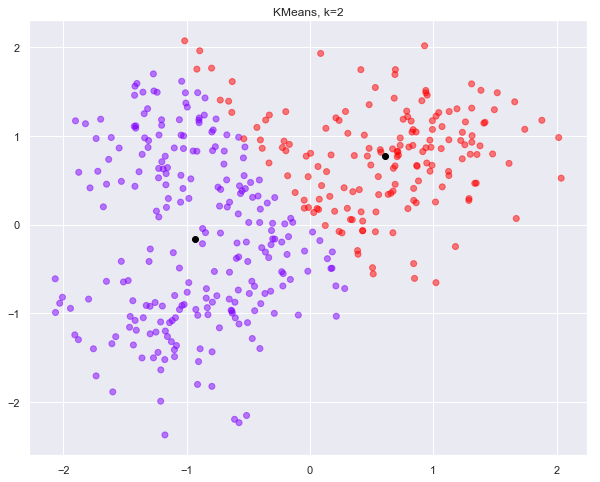

In [543]:
k=2
classes, centers = KMeans(X, k, seed=42)
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=classes, cmap='rainbow_r', alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], c='black', cmap='rainbow_r', alpha=1)
plt.title(f"KMeans, k={k}")

Text(0.5, 1.0, 'KMeans, k=3')

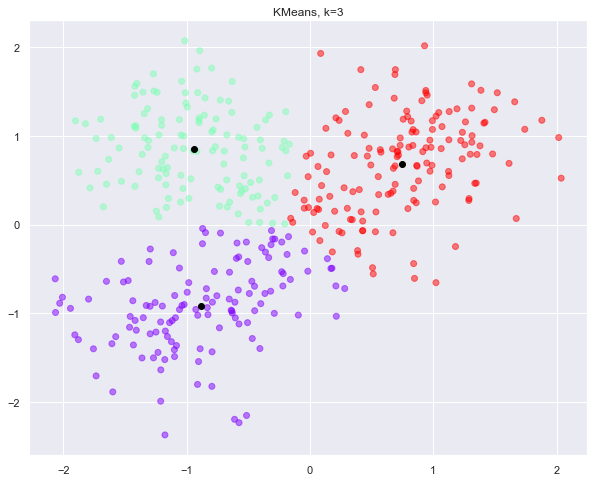

In [544]:
k=3
classes, centers = KMeans(X, k, seed=42)
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=classes, cmap='rainbow_r', alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], c='black', cmap='rainbow_r', alpha=1)
plt.title(f"KMeans, k={k}")

Text(0.5, 1.0, 'KMeans, k=4')

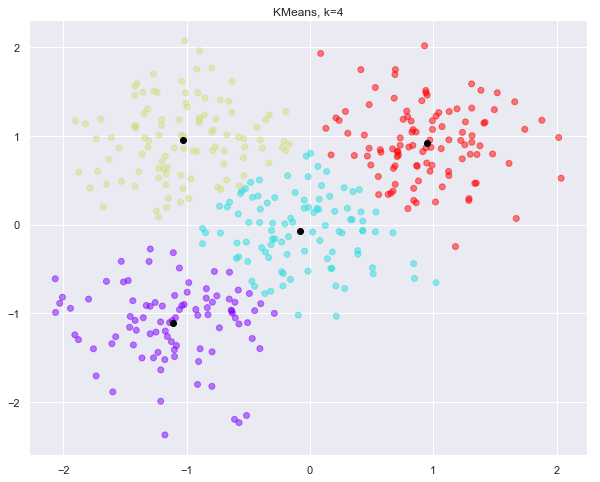

In [545]:
k=4
classes, centers = KMeans(X, k, seed=42)
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=classes, cmap='rainbow_r', alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], c='black', cmap='rainbow_r', alpha=1)
plt.title(f"KMeans, k={k}")

Text(0.5, 1.0, 'KMeans, k=5')

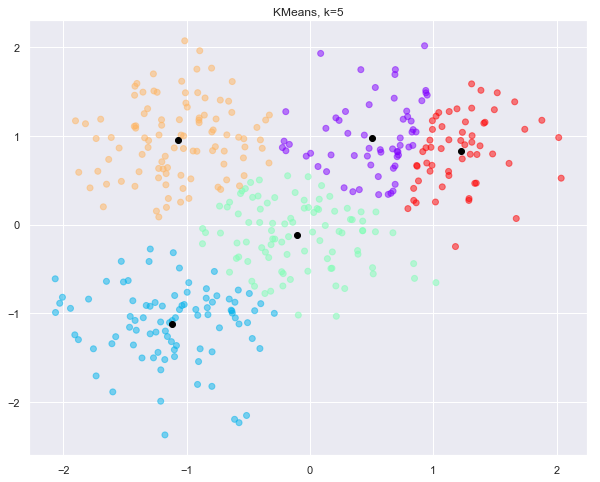

In [546]:
k=5
classes, centers = KMeans(X, k, seed=42)
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=classes, cmap='rainbow_r', alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], c='black', cmap='rainbow_r', alpha=1)
plt.title(f"KMeans, k={k}")

### DBSCAN

In [245]:
def DBSCAN(X, eps, m):
    def dbscan_get_neighbours(point_id, distances, eps):
        return np.where((distances[point_id][:] > 0) & (distances[point_id][:] < eps))[0]
    
    def dbscan_get_recursive_neighbours(points, distances, checked_points, m, eps):
        new_checked_points = set(checked_points)
        for point in points:
            if point not in new_checked_points:
                new_checked_points.add(point)
                point_neighbours = dbscan_get_neighbours(point, distances, eps)
                if point_neighbours.shape[0] >= m:
                    new_checked_points = new_checked_points.union(
                        dbscan_get_recursive_neighbours(point_neighbours, distances,
                                                        new_checked_points, m, eps))
        return new_checked_points

    import random
    distances = distance.cdist(X, X, metric='euclidean')
    n = X.shape[0]
    noise_points = set([])
    unknown_points = set([])
    unchecked_points = set(np.arange(n))
    point2class = np.zeros(n)
    cur_class = 1
    while len(unchecked_points) > 0:
        start_point = list(unchecked_points)[0]
        unchecked_points.remove(start_point)
        point_neighbours = dbscan_get_neighbours(start_point, distances, eps)
        if point_neighbours.shape[0] == 0:
            noise_points.add(start_point)
        elif point_neighbours.shape[0] < m:
            unknown_points.add(start_point)
        else:
            point2class[start_point] = cur_class
            
            checked_points = set(np.arange(n)) - unchecked_points
            new_checked_points = dbscan_get_recursive_neighbours(point_neighbours, distances,
                                                                 checked_points, m, eps)
            for point in new_checked_points:
                if point not in checked_points:
                    unchecked_points.remove(point)
                    point2class[point] = cur_class
            checked_points = new_checked_points
            cur_class += 1
    for point in unknown_points:
        point_neighbours = dbscan_get_neighbours(point, distances, eps)
        classes = point2class[point_neighbours]
        classes = classes[classes > 0]
        if classes.shape[0] > 0:
            point2class[point] = int(Counter(classes).most_common()[0][0])
    return point2class

Text(0.5, 1.0, 'DBSCAN, 4 clusters, eps=0.2072072072072072, m=6')

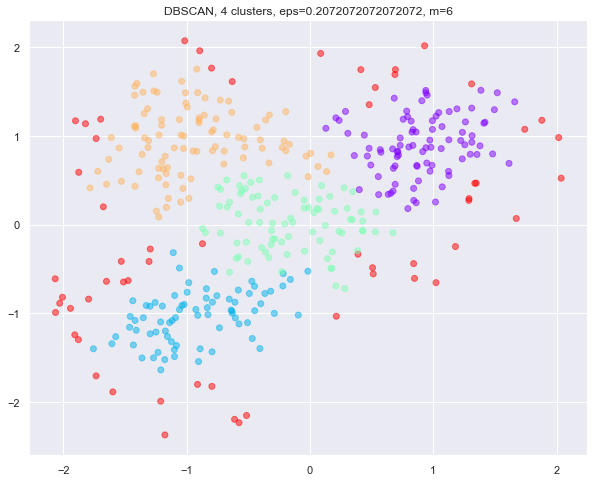

In [372]:
eps = 0.2072072072072072
m = 6
classes = DBSCAN(df.values, eps=eps, m=m)
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=classes, cmap='rainbow_r', alpha=0.5)
plt.title(f"DBSCAN, {len(Counter(classes)) - 1} clusters, eps={eps}, m={m}")

### Agglomerative  clustering

In [547]:
def AggClust(X):
    def get_agglomerates(distances, clusters):
        clusters_distances = []
        for i, points_i in clusters.items():
            for j, points_j in clusters.items():
                if i == j:
                    continue
                max_distance = 0
                for point_i in points_i:
                    for point_j in points_j:
                        if distances[point_i][point_j] > max_distance:
                            max_distance = distances[point_i][point_j]
                clusters_distances.append((max_distance, i, j))
        _, cluster1, cluster2 = sorted(clusters_distances)[0]
        return cluster1, cluster2

    from collections import defaultdict
    n = X.shape[0]
    clusters = defaultdict(list)
    for point_id in range(X.shape[0]):
        clusters[point_id].append(point_id)
    distances = distance.cdist(X, X, metric='euclidean')
    clusters_history = []
    clusters_cnt = len(clusters.keys())
    while(clusters_cnt > 1):
        clusters_history.append(dict(clusters))
        cluster1, cluster2 = get_agglomerates(distances, clusters)
        for point_id in clusters[cluster2]:
            clusters[cluster1].append(point_id)
        del clusters[cluster2]
        clusters_cnt = len(clusters.keys())
    return clusters_history

In [549]:
clusters_history = AggClust(X)

Text(0.5, 1.0, 'Agglomerative Clustering (maximum linkage), 2 clusters')

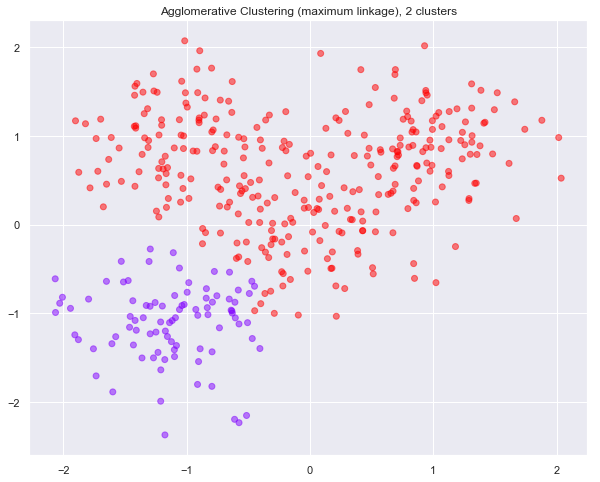

In [550]:
epoch = 398
classes = np.zeros(X.shape[0])
for cluster, points in clusters_history[epoch].items():
    for point in points:
        classes[point] = cluster
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=classes, cmap='rainbow_r', alpha=0.5)
plt.title(f"Agglomerative Clustering (maximum linkage), {len(Counter(classes))} clusters")

Text(0.5, 1.0, 'Agglomerative Clustering (maximum linkage), 10 clusters')

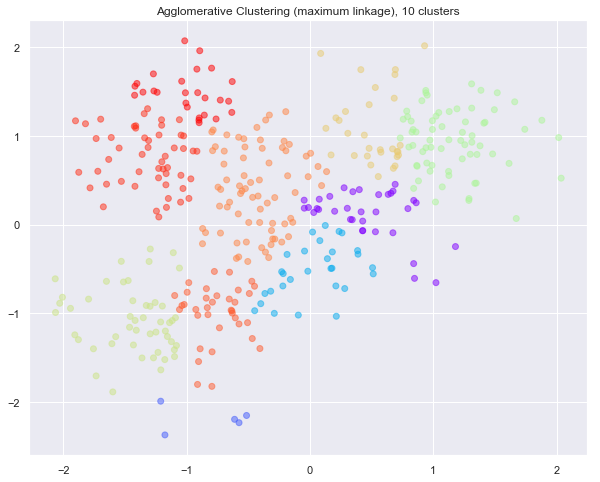

In [551]:
epoch = 390
classes = np.zeros(X.shape[0])
for cluster, points in clusters_history[epoch].items():
    for point in points:
        classes[point] = cluster
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=classes, cmap='rainbow_r', alpha=0.5)
plt.title(f"Agglomerative Clustering (maximum linkage), {len(Counter(classes))} clusters")

Text(0.5, 1.0, 'Agglomerative Clustering (maximum linkage), 4 clusters')

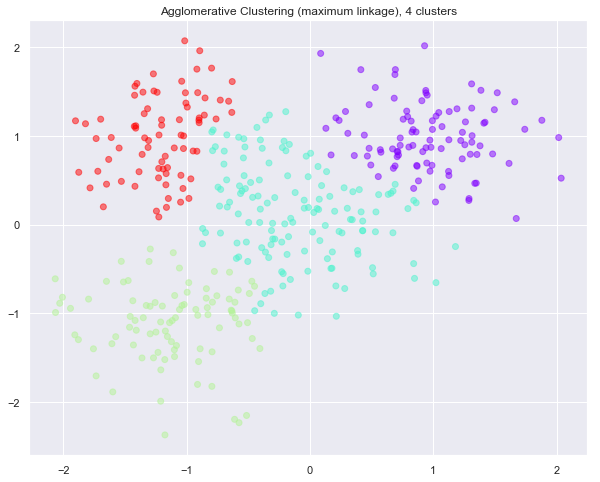

In [552]:
epoch = 396
classes = np.zeros(X.shape[0])
for cluster, points in clusters_history[epoch].items():
    for point in points:
        classes[point] = cluster
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=classes, cmap='rainbow_r', alpha=0.5)
plt.title(f"Agglomerative Clustering (maximum linkage), {len(Counter(classes))} clusters")

### Purity

In [580]:
cancer_df = pd.read_csv('../hw_1/cancer.csv')
cancer_df['int_label'] = cancer_df.label.map({'M':1, 'B':0})
cancer_df['label'] = cancer_df.int_label
cancer_df.drop('int_label', axis=1, inplace=True)

X = cancer_df[cancer_df.columns.difference(['label'])].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = cancer_df.label.values

cancer_df.sample(3)

,label,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
250,1,20.94,23.56,138.90,1364.0,0.10070,0.1606,0.27120,0.13100,0.2205,...,25.58,27.00,165.30,2010.0,0.1211,0.3172,0.6991,0.2105,0.3126,0.07849
523,0,13.71,18.68,88.73,571.0,0.09916,0.1070,0.05385,0.03783,0.1714,...,15.11,25.63,99.43,701.9,0.1425,0.2566,0.1935,0.1284,0.2849,0.09031
560,0,14.05,27.15,91.38,600.4,0.09929,0.1126,0.04462,0.04304,0.1537,...,15.30,33.17,100.20,706.7,0.1241,0.2264,0.1326,0.1048,0.2250,0.08321


In [571]:
def purity(clusters, classes):
    p_sum = 0
    for c in np.unique(classes):
        p_sum += Counter(clusters[classes == c]).most_common()[0][1]
    return p_sum / classes.shape[0]

Unscaled data

In [572]:
for k in range(2, 11):
    clusters, _ = KMeans(X, k, seed=42)
    print(f"k={k}, purity={purity(clusters, y)}")

k=2, purity=0.8541300527240774
k=3, purity=0.7398945518453427
k=4, purity=0.6362038664323374
k=5, purity=0.4938488576449912
k=6, purity=0.4165202108963093
k=7, purity=0.3532513181019332
k=8, purity=0.3251318101933216
k=9, purity=0.27240773286467485
k=10, purity=0.2565905096660808


Scaled data

In [578]:
for k in range(2, 11):
    clusters, _ = KMeans(X_scaled, k, seed=42)
    print(f"k={k}, purity={purity(clusters, y)}")

k=2, purity=0.9279437609841827
k=3, purity=0.7838312829525483
k=4, purity=0.5377855887521968
k=5, purity=0.45166959578207383
k=6, purity=0.4007029876977153
k=7, purity=0.39015817223198596
k=8, purity=0.3602811950790861
k=9, purity=0.31985940246045697
k=10, purity=0.29701230228471004


Вывод: и на нормированных, и на ненормированных данных метрика purity снижается с увеличением количества кластеров.


Это весьма ожидаемо, так как, на самом деле, кластеров 2